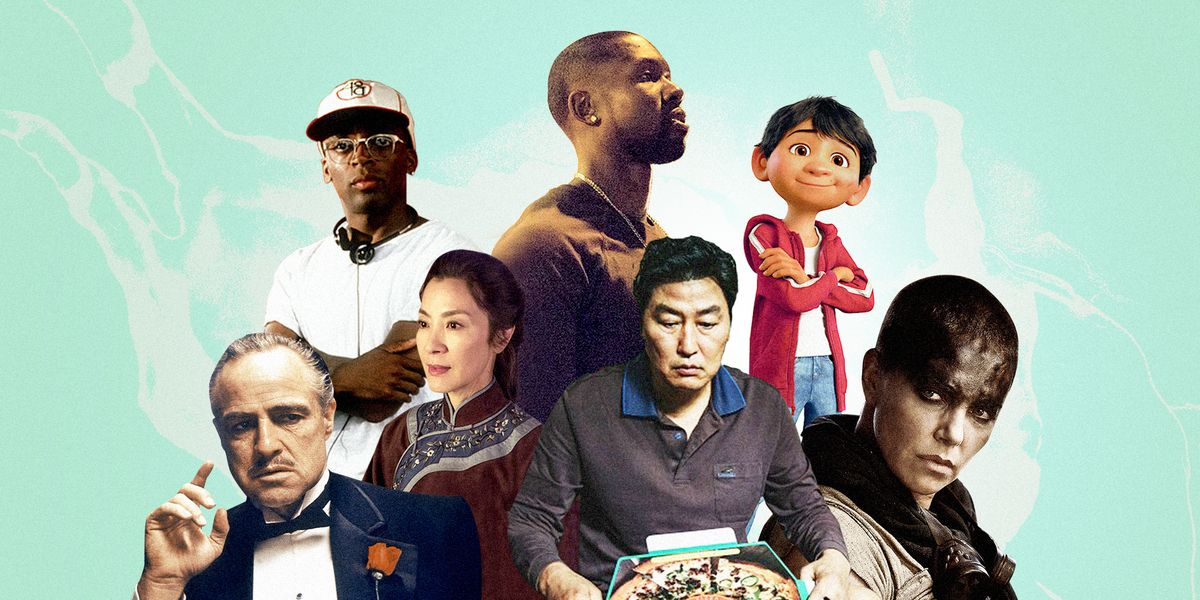

# Microsoft Studios - Building a Movie Studio for the Future

* Student name: Vi Bui
* Student pace: Part-Time
* Scheduled project review date/time: Thu. 08/26/21
* Instructor name: Claude Fried
* Blog post URL: https://datasciish.com/

## Overview

Microsoft would like to create a movie studio. They've asked our company to explore what types of films are currently doing the best at the box office.

**Data, Methodology, and Analysis:** we've explored data from Rotten Tomatoes, Box Office Mojo, IMDB, TheMovieDB, and The Numbers. After much research, we've decided to build a strong foundation for Microsoft Studios by analyzing Production Budget, Worldwide Gross, Genre, Studio, Release Date, and Box Office Revenue data. 

**Results & Recommendations:** After analyzing data from databases containing movie data ranging from 1915-2019, 5234 movies, 99 genres, and 172 Studios, and later narrowing our focus to the past 10-20 years and the top 5 studios, we have recommendations on initial budget considerations, launch timing, and genre assortment.  

## Business Objectives

Make data-driven recommendations to set Microsoft Studios up for success: 

1. Determine baseline production budget
2. Understand competitive and benchmark landscape
3. Propose launch timing
4. Show Genre Efficiency to make informed decisions on genre assortment  

## Data Understanding and Exploration

After exploring numerous movie databases, Box Office Mojo, Rotten Tomatoes, and The Numbers will be our main data sources for Phase 1 analysis, while other data will be used for future analysis. 

**Data explored:** 

** denotes data used in current (Phase 1) analysis <br>
^ denotes data for future analysis

1. Box Office Mojo - Gross: bom.movie_gross.csv** 
2. IMDB - Name Basics: imdb.name.basics.csv ^
3. IMDB - Name Akas: imdb.title.akas.csv.gz
4. IMDB - Title Basics: imdb.title.basics.csv.gz
5. IMDB - Title Crew: imdb.title.crew.csv.gz
6. IMDB - Title Principles: imdb.title.principals.csv.gz
7. IMDB - Title Ratings: imdb.title.ratings.csv.gz ^
8. Rotten Tomatoes - Movie Info: rt.movie_info.tsv **
9. Rotten Tomatoes - Reviews: rt.reviews.tsv ^ 
10. The Movie Database - Movies: tmdb.movies.csv ^ 
11. The Numbers - Movie_Budgets: tn.movie_budgets.csv **

**Merged The Numbers (Movie, Release Date, Production Budget and Worldwide Gross) data and Box Office Mojo (Movie and Studio) data to analyze:** 

1. Correlation between Production Budget and Worldwide Gross for All Movies *and Top Five Grossing Studios
2. Seasonality (monthly trends) by year for movies released between 2009-2019
3. Competitive landscape

**Created Studio & Genre dataset (using Rotten Tomatoes Movie Info) to analyze:** 

3. Genre Efficiency 

# Data Exploration, Cleansing, and Preparation

**Data Exploration** <br>
Outlined in detail in comments: files explored, how data was chosen, which files will be used for Phase 1 proposal, and which files will be used in future analysis

**Data Cleansing** <br>
Dropped duplicates, NaN values, and unnecessary columns; continuously cleansed data as necessary 

**Data Preparation** <br>
Core variables: Production Budget, Worldwide Gross, Genre, Studio, Release Date, Box Office Revenue. Chose data that best served analysis, merged data, and created clean datasets and visualizations for analysis 

In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Reviewed each file by looking at the data available in each and reviewing the columns, shape, and exploring the overall dataframe. Few examples below: 

In [2]:
# Rotten Tomatoes - Reviews file ('rt.reviews.tsv.gz') includes: 
# 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher','date' 

# While this file will not be used for initial analysis, we will explore Ratings data in future analysis

df_rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin1')
df_rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

The Movie Database data will also be used for a future analysis. 

* Metrics: Popularity, Vote, and Vote Count will be used <br>
* Note: merge with 'merged_df' which contains Studio and Worldwide Gross data <br>
* Genre IDs can be found at: https://www.reddit.com/r/radarr/comments/70egj8/tmdb_genre_id_values/

In [3]:
# The Movie Database - Movies ('tmdb.movies.csv') includes: 
# 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 
# 'title', 'vote_average', 'vote_count'

df_tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv')
df_tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [4]:
# Explore the data further to by putting in a pandas DataFrame

pd.read_csv('zippedData/tmdb.movies.csv')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


We did the above with every data source until we found the sources with the variables needed for our analysis <br>
<br>
At the most fundamental level, we wanted to give Microsoft an idea of Production Budget, Worldwide Gross, and 
whether there was a correlation between these two variables

In [5]:
# The Numbers - Budgets data ('tn.movie_budgets.csv') had the data we needed: 
# 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross','worldwide_gross'

df_tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
# clean the data - format the data in order to run statistical analysis 
# replace '$' and ',' symbols and convert data type (from string) to integers

df_tn_movie_budgets['production_budget'] = (df_tn_movie_budgets['production_budget']
                                            .apply(lambda x: x.replace('$','')
                                            .replace(',','')).
                                            astype(int))

df_tn_movie_budgets


df_tn_movie_budgets['domestic_gross'] = (df_tn_movie_budgets['domestic_gross']
                                         .apply(lambda x: x.replace('$','')
                                         .replace(',',''))
                                         .astype(int))

df_tn_movie_budgets


df_tn_movie_budgets['worldwide_gross'] = (df_tn_movie_budgets['worldwide_gross']
                                          .apply(lambda x: x.replace('$','')
                                          .replace(',',''))
                                          .astype(int))

df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [7]:
# clean the data further - drop duplicates, NaN values, and rows containing zeros
# use method chaining and clean code 

df_tn_movie_budgets = (df_tn_movie_budgets.drop_duplicates()
                       .dropna()
                       .loc[(df_tn_movie_budgets!=0)
                       .all(1)].drop(columns=['id']))

df_tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644
5776,"Dec 31, 2004",The Mongol King,7000,900,900
5778,"Apr 2, 1999",Following,6000,48482,240495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


## Business Objective #1 - Baseline Budget

* **Objective:** Determine baseline production budget 
* **Results:** <br> 1. Data shows strong correlation (0.75) between Production Budget and Worldwide Gross for **all movies** in the database (5782 films from 1915-2019). Average Production Budget is 34,033,480 and Average Worldwide Gross is 100,761,506. <br> <br> 2. Data shows the strongest correlation between the three databases observed (0.79) between Production Budget and Worldwide Gross for **all films from the past ten years** (1992 films from 1998-2018). Average Production Budget is 42,638,335 and Average Worldwide Gross is 134,678,815. <br><br> 3. Data shows the weakest, though still strong, correlation (0.72) for Production Budget and Worldwide Gross for **movies from the top fives studios in the last 10 years** (465 films from 1998-2018). Average Production Budget is 79,098,925 and Average Worldwide Gross is 272,398,792. 
* **Recommendations:** Plan for Baseline Production Budget: 43MM, Midrange Budget: 61MM, and High-End/Blockbuster Budget: 79MM. 
* **Source:** The Numbers Database

In [8]:
# create clean variables for statistical analysis and calculate correlation between budget and worldwide gross

budget = df_tn_movie_budgets['production_budget']
domestic_gross = df_tn_movie_budgets['domestic_gross']
worldwide_gross = df_tn_movie_budgets['worldwide_gross']

correlation_budget_gross = budget.corr(worldwide_gross)
correlation_budget_gross

0.7448749649291818

ANALYSIS: with a correlation of 0.75, there is a strong positive correlation between budget and worldwide gross 

In [9]:
# create a regression plot to visualize correlation 

sns.set_palette("GnBu_r")
plt.style.use(["seaborn-talk"])
sns.set_style("darkgrid")

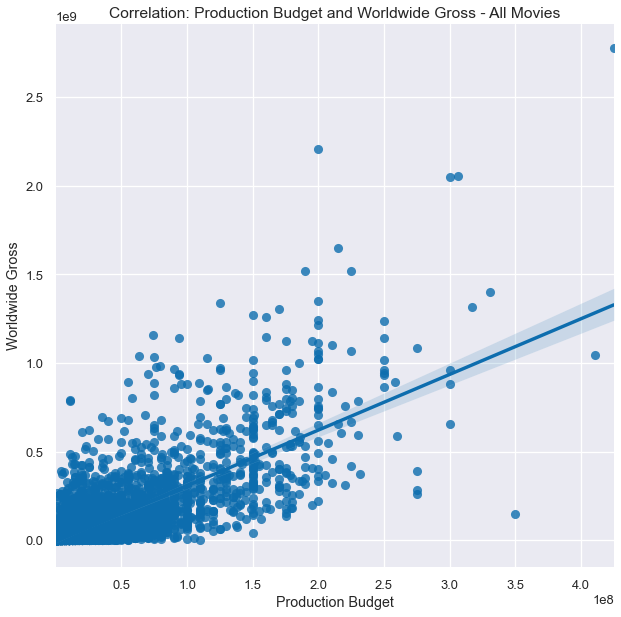

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

sns.regplot(x="production_budget", 
            y="worldwide_gross",
            data=df_tn_movie_budgets, 
            ax=ax)

ax.set(xlabel="Production Budget", 
       ylabel="Worldwide Gross", 
       title="Correlation: Production Budget and Worldwide Gross - All Movies");

In [11]:
# explore mean and median of Production Budget and Worldwide Gross for all films in the data 

print("Production Budget Mean is",budget.mean())
print("Production Budget Median is",budget.median())
print("Worldwide Gross Mean is",worldwide_gross.mean())
print("Worldwide Gross Median is",worldwide_gross.median())

Production Budget Mean is 34033480.04948414
Production Budget Median is 20000000.0
Worldwide Gross Mean is 100761506.15494841
Worldwide Gross Median is 35438436.0


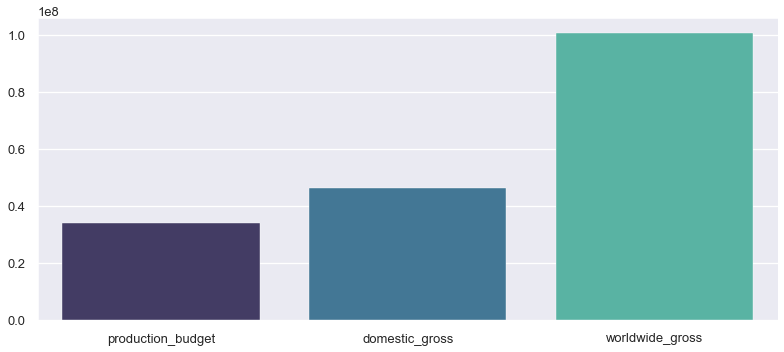

In [12]:
# create quick plot to look at Production Budget, Domestic Gross, and Worldwide Gross
# will not be used in final analysis, but helps determine using worldwide gross vs. domestic gross

f, ax = plt.subplots(figsize=(11, 5))

sns.barplot(data=df_tn_movie_budgets, 
            ci=None, 
            palette="mako")

f.tight_layout()

In [13]:
# explore & check - which movies are the highest worldwide grossing films?

df_tn_movie_budgets.sort_values(by='worldwide_gross', ascending=False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
...,...,...,...,...,...
5027,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,673
5466,"May 11, 2018",Higher Power,500000,528,528
5769,"Apr 1, 1996",Bang,10000,527,527
5518,"Oct 13, 2005",The Dark Hours,400000,423,423


In [14]:
# create Year and Month columns for Seasonality analysis 

df_tn_movie_budgets['Year'] = df_tn_movie_budgets['release_date'].str[-4:].astype(int)
df_tn_movie_budgets['Month'] = df_tn_movie_budgets['release_date'].str[:3]
df_tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec
...,...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,2006,May
5776,"Dec 31, 2004",The Mongol King,7000,900,900,2004,Dec
5778,"Apr 2, 1999",Following,6000,48482,240495,1999,Apr
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,Jul


In [15]:
# check date range of movie release dates 

print(min(df_tn_movie_budgets['Year']))
print(max(df_tn_movie_budgets['Year']))

1915
2019


In [16]:
# explore - look at data from most recent to oldest 

df_tn_movie_budgets.sort_values(by='Year', ascending=False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month
3795,"May 17, 2019",The Sun is Also a Star,9000000,4950029,5434029,2019,May
2520,"Feb 8, 2019",What Men Want,20000000,54611903,69911903,2019,Feb
1380,"May 17, 2019",John Wick: Chapter 3 â Parabellum,40000000,141744320,256498033,2019,May
393,"Mar 15, 2019",Wonder Park,100000000,45216793,115149422,2019,Mar
4534,"Jun 7, 2019",Late Night,4000000,246305,246305,2019,Jun
...,...,...,...,...,...,...,...
5606,"Nov 19, 1925",The Big Parade,245000,11000000,22000000,1925,Nov
4569,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925,Dec
5683,"Sep 17, 1920",Over the Hill to the Poorhouse,100000,3000000,3000000,1920,Sep
5614,"Dec 24, 1916","20,000 Leagues Under the Sea",200000,8000000,8000000,1916,Dec


In [17]:
# exploration - create column to determine each film's percentage of total worldwide gross in data set 
# will not use in Phase 1 analysis 

worldwide_gross_sum = df_tn_movie_budgets['worldwide_gross'].sum()
worldwide_gross_sum

df_tn_movie_budgets['Percentage of WW Gross'] = df_tn_movie_budgets['worldwide_gross'].apply(lambda x: x/worldwide_gross_sum)
df_tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Percentage of WW Gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec,5.264354e-03
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May,1.982731e-03
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun,2.839712e-04
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,2.660318e-03
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec,2.496696e-03
...,...,...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,2006,May,1.358474e-07
5776,"Dec 31, 2004",The Mongol King,7000,900,900,2004,Dec,1.706531e-09
5778,"Apr 2, 1999",Following,6000,48482,240495,1999,Apr,4.560135e-07
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,Jul,2.537043e-09


* Knowing 2019 is the most recent year with data, filter the data to the last 10 years in order to perform seasonality analysis
* Future analysis - expand date range for future analysis

In [18]:
# in the meantime, 10 years data keeps a tight focus for our Seasonality analysis; filter to 10 years 

df_filtered_ten_years = df_tn_movie_budgets[df_tn_movie_budgets['Year'] >= 2009]
df_filtered_ten_years

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Percentage of WW Gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec,5.264354e-03
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May,1.982731e-03
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun,2.839712e-04
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,2.660318e-03
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec,2.496696e-03
...,...,...,...,...,...,...,...,...
5737,"Mar 18, 2016",Krisha,30000,144822,144822,2016,Mar,2.746036e-07
5740,"Oct 15, 2010",Down Terrace,30000,9812,9812,2010,Oct,1.860498e-08
5744,"Jan 27, 2017",Emily,27000,3547,3547,2017,Jan,6.725628e-09
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,2010,Apr,2.191792e-07


In [19]:
# check new date range 

print(min(df_filtered_ten_years['Year']))
print(max(df_filtered_ten_years['Year']))

2009
2019


In [20]:
budget_ten_years = df_filtered_ten_years['production_budget']
worldwide_gross_ten_years = df_filtered_ten_years['worldwide_gross']

correlation_budget_gross_ten_years = budget_ten_years.corr(worldwide_gross_ten_years)

print(correlation_budget_gross_ten_years)

print("Production Budget Mean is",budget_ten_years.mean())
print("Worldwide Gross Mean is",worldwide_gross_ten_years.mean())

0.790767459047154
Production Budget Mean is 42638334.66365462
Worldwide Gross Mean is 134678814.82781124


* Part 1 of data preparation complete 

In [21]:
# df_tn_movie_budgets is a clean data set with movie, production budget, worldide gross, month, and year data 
# df_filtered_ten_years is clean data set filtered to 2009-2019 movie data for Seasonality analysis

## Business Objective #2 - Competitive & Benchmark Landscape

* **Objective:** Understand competitive and benchmark landscape
* **Results:** The Top Five Studios in the Box Office Mojo are: The Walt Disney Company ('BV'), Universal Pictures  ('Uni.'), 20th Century Fox Studios ('Fox'), Warner Bros. ('WB'), and Sony Studios ('Sony')
* Data shows relatively strong (0.72) correlation between Production Budget and Worldwide Gross for the top five studios; though slightly lower than overall movie data 
* **Recommendations:** We will use these studios as the benchmark landscape for our Phase 1 analysis, but strongly suggest we analyze "Studio Efficiency" metrics to determine whether Microsoft would like to take a different genre assortment and launch approach to set themselves apart from the top five studios
* **Source:** 1. The Numbers and 2. Box Office Mojo Databases 

Part 2: we would like to analyze worldwide gross as it relates to movie *studio* 

In [22]:
# the Box Office Mojo data ('bom.movie_gross.csv') has the data needed to merge with The Numbers data
# the Box Office Mojo data contains: 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'

# Rename the title column to 'movie' to match The Numbers data
# Use worldwide gross and dates data from The Numbers
# Drop 'domestic_gross','foreign_gross', 'year' from Box Office Mojo data

df_bom_studio = pd.read_csv('zippedData/bom.movie_gross.csv')

df_bom_studio = (
    df_bom_studio
    .drop_duplicates()
    .dropna()
    .loc[(df_bom_studio!=0).all(1)]
    .rename(columns={"title": "movie"})
    .drop(columns=['domestic_gross', 'foreign_gross', 'year'])
)

df_bom_studio

,movie,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3275,I Still See You,LGF
3286,The Catcher Was a Spy,IFC
3309,Time Freak,Grindstone
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa


In [23]:
# data check - there are 172 unique studios in this dataset

df_bom_studio['studio'].nunique()

172

In [24]:
# merge The Numbers dataset with the Box Office Mojo dataset to incorporate Studio info

merged_df = df_filtered_ten_years.merge(df_bom_studio, how='left', on='movie')
merged_df

merged_df_sorted = merged_df.sort_values(by='worldwide_gross', ascending=False)
merged_df_sorted

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Percentage of WW Gross,studio
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec,5.264354e-03,NaN
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,Dec,3.893377e-03,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,Apr,3.883560e-03,BV
27,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,Jun,3.126469e-03,Uni.
55,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,2015,Apr,2.879719e-03,Uni.
...,...,...,...,...,...,...,...,...,...
1924,"Dec 14, 2018",That Way Madness Lies,650000,1447,1447,2018,Dec,2.743722e-09,NaN
1461,"May 8, 2015",Skin Trade,9000000,1242,1242,2015,May,2.355013e-09,NaN
1902,"May 15, 2015",Childless,1000000,1036,1036,2015,May,1.964407e-09,NaN
1542,"May 21, 2010",Perrierâs Bounty,6600000,828,828,2010,May,1.570008e-09,NaN


In [25]:
# explore - create a new dataframe grouping Studios and determine the top five studios

studio_groupby = merged_df.groupby(['studio']).sum()

studio_groupby = studio_groupby.drop(['Year'], axis=1)

studio_groupby
studio_groupby.sort_values(by='worldwide_gross', ascending=False)

,production_budget,domestic_gross,worldwide_gross,Percentage of WW Gross
studio,,,,
BV,9426800000,12903580160,33262637282,6.307080e-02
Uni.,6572700000,10691338728,27305781963,5.177573e-02
Fox,7614000000,9230526153,26422455030,5.010082e-02
WB,8125000000,9119256428,22163568959,4.202535e-02
Sony,5042500000,6969143893,17510994901,3.320339e-02
...,...,...,...,...
P4,4000000,9120,978527,1.855429e-06
VE,30000000,490973,648599,1.229838e-06
Mont.,5000000,127564,282687,5.360156e-07


In [26]:
# create new dataframe to explore number of movies created by each studio 

studio_movie_count = pd.DataFrame(merged_df.groupby('studio').size())
studio_movie_count.columns = ["number_of_movies"]
studio_movie_count

,number_of_movies
studio,
3D,1
A24,11
ATO,1
Affirm,2
Amazon,1
...,...
W/Dim.,8
WB,99
WB (NL),36


In [27]:
# merge studio_groupby data with studio_movie_count data to dig deeper into studio data 
# create a column to determine worldwide gross per movie ("Studio Efficiency")

merged_studio_df = studio_groupby.merge(studio_movie_count, how='left', on='studio')

merged_studio_df['ww_gross_per_movie'] = (merged_studio_df['worldwide_gross'] / merged_studio_df['number_of_movies'])
merged_studio_df.head(20)

merged_studio_df.sort_values(by='worldwide_gross', ascending=False)

,production_budget,domestic_gross,worldwide_gross,Percentage of WW Gross,number_of_movies,ww_gross_per_movie
studio,,,,,,
BV,9426800000,12903580160,33262637282,6.307080e-02,70,4.751805e+08
Uni.,6572700000,10691338728,27305781963,5.177573e-02,116,2.353947e+08
Fox,7614000000,9230526153,26422455030,5.010082e-02,107,2.469388e+08
WB,8125000000,9119256428,22163568959,4.202535e-02,99,2.238744e+08
Sony,5042500000,6969143893,17510994901,3.320339e-02,73,2.398766e+08
...,...,...,...,...,...,...
P4,4000000,9120,978527,1.855429e-06,1,9.785270e+05
VE,30000000,490973,648599,1.229838e-06,1,6.485990e+05
Mont.,5000000,127564,282687,5.360156e-07,1,2.826870e+05


For reference: 
    
* 'BV' is Buena Vista, i.e. The Walt Disney Company  <br>
* 'Uni.' is Universal Pictures <br>
* 'Fox' is. 20th Century Fox Studios <br>
* 'WB' is Warner Bros. <br>
* 'Sony' is Sony Pictures <br>

In [28]:
# further exploration - analyze top five studio performance 

top_five_studios_ww_gross = ['BV','Uni.','Fox','WB','Sony']
top_five_studio_gross_info = merged_df_sorted[merged_df_sorted.studio.isin(top_five_studios_ww_gross)]
top_five_studio_gross_info.sort_values(by="Year", ascending=True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Percentage of WW Gross,studio
527,"Oct 15, 2010",Hereafter,50000000,32746941,108660270,2010,Oct,0.000206,WB
596,"Jun 11, 2010",The Karate Kid,40000000,176591618,351774938,2010,Jun,0.000667,Sony
604,"Oct 1, 2010",The Social Network,40000000,96962694,224922135,2010,Oct,0.000426,Sony
255,"Sep 24, 2010",Legend of the Guardians: The Owls of Ga'Hoole,100000000,55675313,139716717,2010,Sep,0.000265,WB
621,"Jun 4, 2010",Get Him to the Greek,40000000,61153526,91455875,2010,Jun,0.000173,Uni.
...,...,...,...,...,...,...,...,...,...
1354,"Jan 5, 2018",Insidious: The Last Key,10000000,67745330,167885588,2018,Jan,0.000318,Uni.
715,"Oct 12, 2018",Goosebumps 2: Haunted Halloween,35000000,46697321,93291478,2018,Oct,0.000177,Sony
218,"May 18, 2018",Deadpool 2,110000000,324591735,786680557,2018,May,0.001492,Fox
264,"Dec 14, 2018",Mortal Engines,100000000,15951040,85287417,2018,Dec,0.000162,Uni.


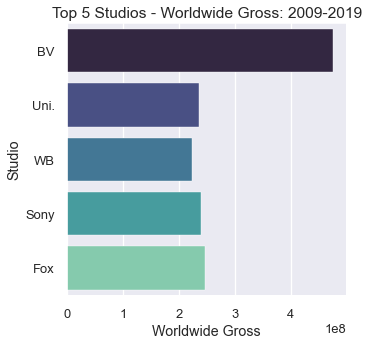

In [29]:
# explore - create visual for top five studios Worldwide Gross 

sns.set_style("darkgrid")
sns.set_palette("mako")

info1 = top_five_studio_gross_info.sort_values("worldwide_gross", ascending=False)
info1

f, ax = plt.subplots(figsize=(5, 5))

sns.barplot(x="worldwide_gross", y="studio", data=info1, ci=None, palette="mako").set(xlabel="Worldwide Gross", 
            ylabel="Studio", title="Top 5 Studios - Worldwide Gross: 2009-2019");

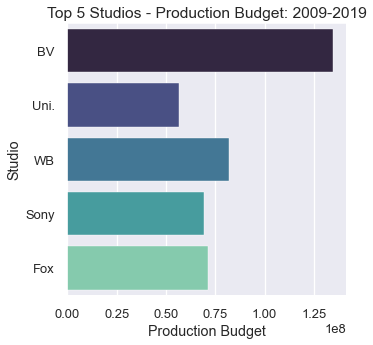

In [30]:
# create visual for top five studios Production Budget 

sns.set_palette("mako")
sns.set_style("darkgrid")

info1 = top_five_studio_gross_info.sort_values("worldwide_gross", ascending=False)
info1

f, ax = plt.subplots(figsize=(5, 5))

sns.barplot(x="production_budget", y="studio", data=info1, ci=None, palette="mako").set(xlabel="Production Budget", 
            ylabel="Studio", title="Top 5 Studios - Production Budget: 2009-2019");

* Determine the correlation between production budget and worldwide gross for top five studios <br>
* ANALYSIS: correlation is 0.72; relatively strong positive correlation but not as strong as all movie data  

In [31]:
budget_top_five = top_five_studio_gross_info['production_budget']
domestic_gross_top_five = top_five_studio_gross_info['domestic_gross']
worldwide_gross_top_five = top_five_studio_gross_info['worldwide_gross']

correlation_budget_gross_top_five = budget_top_five.corr(worldwide_gross_top_five)

print(correlation_budget_gross_top_five)
print("Production Budget Mean is",budget_top_five.mean())
print("Production Budget Median is",budget_top_five.median())
print("Worldwide Gross Mean is",worldwide_gross_top_five.mean())
print("Worldwide Gross Median is",worldwide_gross_top_five.median())

0.7201090088960176
Production Budget Mean is 79098924.7311828
Production Budget Median is 55000000.0
Worldwide Gross Mean is 272398791.68817204
Worldwide Gross Median is 156553592.0


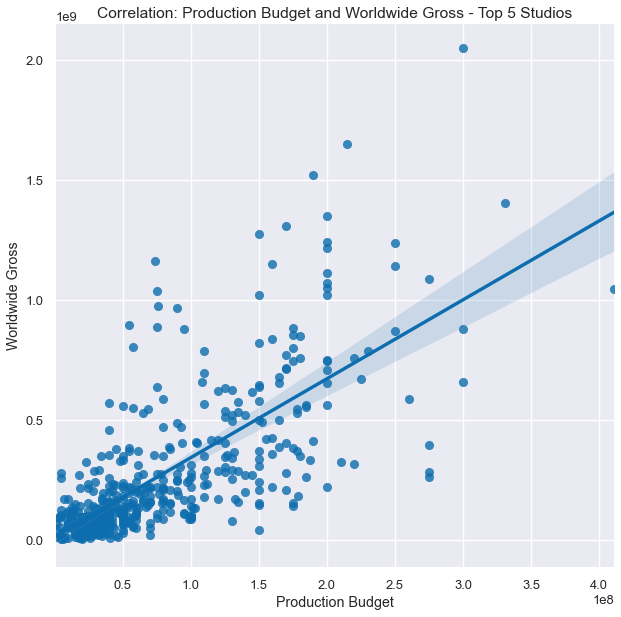

In [32]:
# create a regression plot to visualize correlation for top five studios

sns.set_palette("GnBu_r")
plt.style.use(["seaborn-talk"])

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

sns.regplot(x="production_budget", 
            y="worldwide_gross",
            data=top_five_studio_gross_info, 
            ax=ax)

ax.set(xlabel="Production Budget", 
       ylabel="Worldwide Gross", 
       title="Correlation: Production Budget and Worldwide Gross - Top 5 Studios");

## Business Objective #3 - Launch Timing 

* **Objective:** Propose launch timing
* **Results:** Movies are released and gross the highest in Summer (May-July) and Holiday (Nov-Dec) months; this trend is more pronounced when looking at the top five studios  
* **Recommendations:** While there is appeal in launching during the most popular months, we think there is an opportunity to capture "off" months while other studios are less active 
* **Source:** 1. The Numbers and 2. Box Office Mojo Databases 

In [33]:
# explore data

top_five_studio_gross_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 6 to 1642
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_date            465 non-null    object 
 1   movie                   465 non-null    object 
 2   production_budget       465 non-null    int64  
 3   domestic_gross          465 non-null    int64  
 4   worldwide_gross         465 non-null    int64  
 5   Year                    465 non-null    int64  
 6   Month                   465 non-null    object 
 7   Percentage of WW Gross  465 non-null    float64
 8   studio                  465 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 36.3+ KB


* Business objective: explore Seasonality 
* We now have all the data needed to work on Business Question #2: Seasonality and Launch Timing 

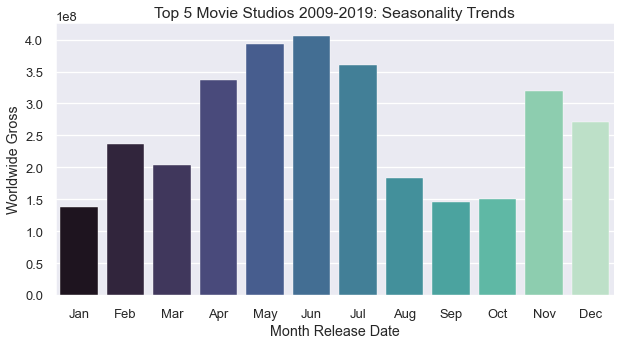

In [34]:
# create a bar plot to look at *top five studio* seasonality for the ten years between 2009-2019 (cumulative)

sns.set_palette("mako")
f, ax = plt.subplots(figsize=(10, 5))

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.barplot(x="Month", 
            y="worldwide_gross", 
            data=top_five_studio_gross_info, 
            palette="mako", 
            order=Months, 
            ci=None)

ax.set(xlabel="Month Release Date", 
       ylabel="Worldwide Gross", 
       title="Top 5 Movie Studios 2009-2019: Seasonality Trends");

In [35]:
# FOR FUTURE: FORMAT DATA POINTS SO WORLDWIDE GROSS HIGHEST TO LOWEST IS COLOR-SCALED FROM DARKEST TO LIGHTEST

# sns.set_palette("mako")
# f, ax = plt.subplots(figsize=(10, 5))

# Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# sns.barplot(x="Month", y="worldwide_gross", data=top_five_studio_gross_info.groupby("Month").sum().reset_index(), palette="mako", order=Months, 
#             ci=None, hue = "worldwide_gross")

# ax.set(xlabel="Month Release Date", ylabel="Worldwide Gross", 
#             title="Top 5 Movie Studios 2009-2019: Seasonality Trends");

In [36]:
# CODE FOR FUTURE USE 
top_five_studio_gross_info.groupby("Month").sum()

,production_budget,domestic_gross,worldwide_gross,Year,Percentage of WW Gross
Month,,,,,
Apr,2185000000,3021423393,9435628627,56379,0.017891
Aug,1919000000,2745314085,5674919009,62419,0.010760
Dec,3599700000,5462416241,12473899624,92650,0.023652
Feb,2046500000,3273911479,7793201455,66465,0.014777
Jan,1125500000,1526216440,3296087861,48332,0.006250
Jul,4981500000,6782444945,19090459744,106738,0.036198
Jun,4862000000,7789852188,19035921617,94636,0.036095
Mar,2925200000,2952447060,7760744822,76524,0.014716
May,4680700000,5145095814,14569519531,74532,0.027626


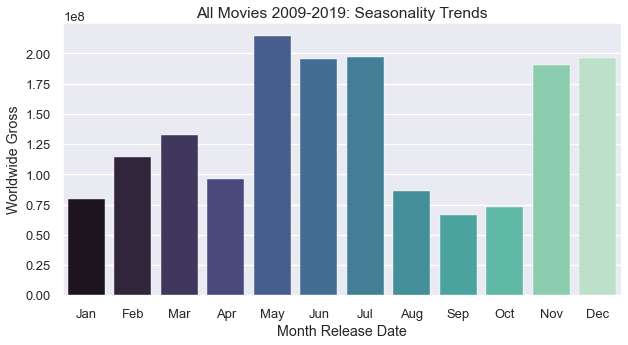

In [37]:
# create a bar plot to look at *all movies* seasonality for the ten years between 2009-2019 (cumulative)

sns.set_palette("mako")
f, ax = plt.subplots(figsize=(10, 5))

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.barplot(x="Month", 
            y="worldwide_gross", 
            data=merged_df, 
            palette="mako", 
            order=Months, 
            ci=None)

ax.set(xlabel="Month Release Date", 
       ylabel="Worldwide Gross", 
       title="All Movies 2009-2019: Seasonality Trends");

* From above, observe the difference vs. top five studio seasonality 
* QUICK OBSERVATION: the top five studios have strong worldwide gross in February, June, and November 

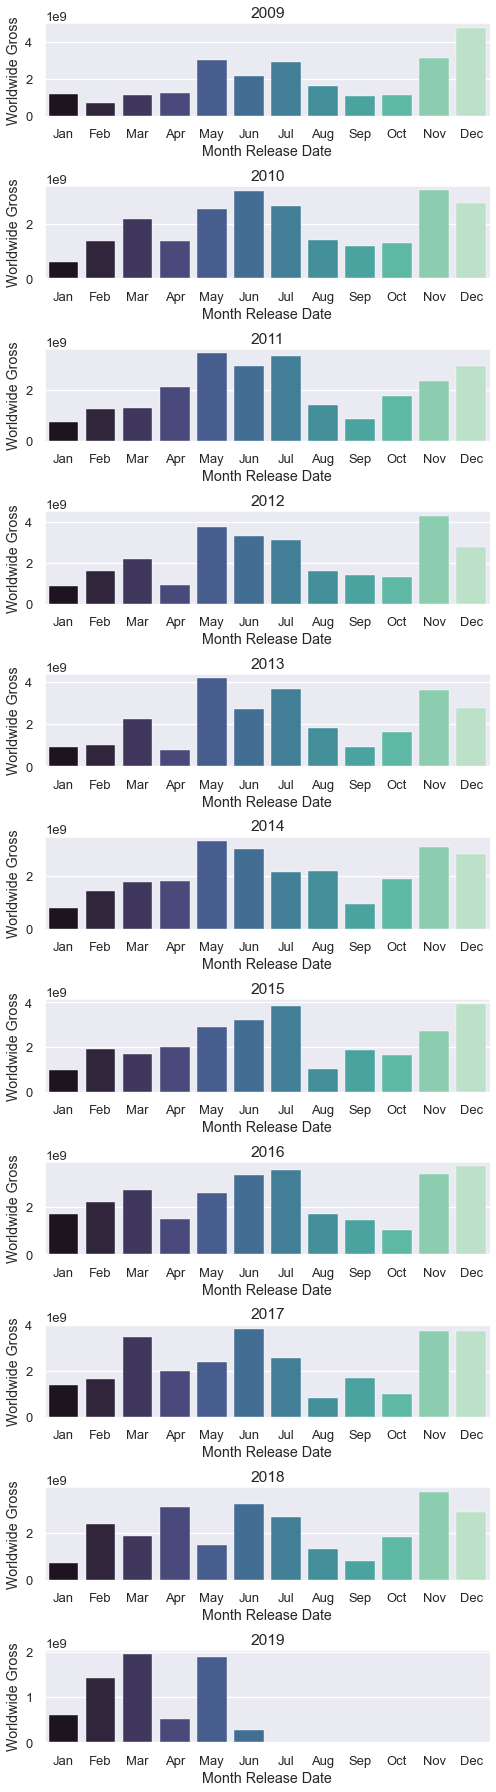

In [38]:
# further analysis - observe seasonality over ten individual year periods (2009-2019) for *all movies*
# create a bar plot to visualize the data 

sns.set_palette("mako")

ten_year = df_filtered_ten_years.groupby(['Year','Month']).sum().reset_index()
f,ax_list=plt.subplots(nrows=11, figsize=(7,25))

for year,ax in zip(range(ten_year['Year'].min(), ten_year['Year'].max()+1),
                   ax_list):
    year_data = ten_year[ten_year['Year'] == year]
    
    sns.barplot(x="Month", 
                y="worldwide_gross", 
                data=year_data, 
                palette="mako", 
                ax=ax, 
                order=Months, 
                ci=None)
    
    ax.set(xlabel="Month Release Date", 
           ylabel="Worldwide Gross", 
           title=year)

f.tight_layout()

# REVISIT - FORMAT DATA POINTS SO WORLDWIDE GROSS HIGHEST TO LOWEST IS COLOR-SCALED FROM DARKEST TO LIGHTEST
# WILL BE STRONGER VISUALIZATION 
# pal = sns.color_palette("GnBu")
# rank = df_filtered_ten_years[df_filtered_ten_years['worldwide_gross'].argsort().argsort() 
# palette=np.array(pal[::-1])[rank]

# note: 2019 only has half year's worth of data 

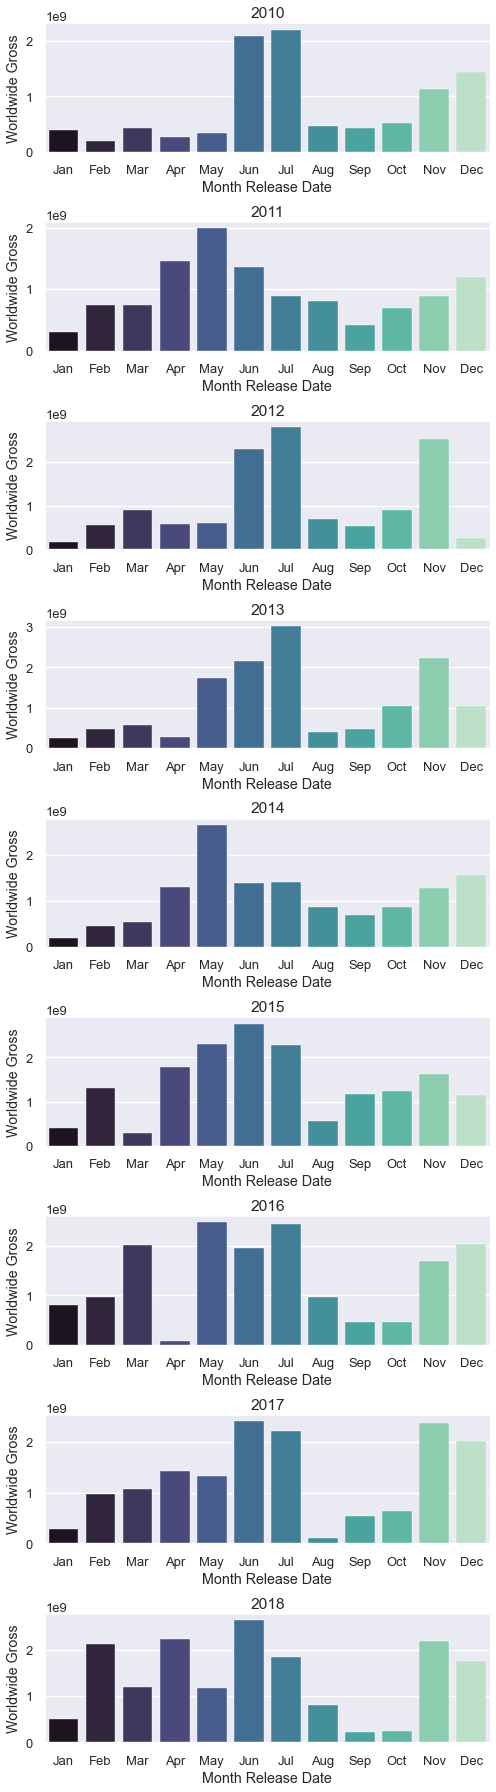

In [39]:
# observe seasonality over ten individual year periods (2009-2019) for *top five studios*
# create a bar plot to visualize the data

sns.set_palette("mako")

top_five_graph = top_five_studio_gross_info.groupby(['Year','Month']).sum().reset_index()
f,ax_list=plt.subplots(nrows=9, figsize=(7,25))

for year,ax in zip(range(top_five_graph['Year'].min(), top_five_graph['Year'].max()+1),
                   ax_list):
    year_data = top_five_graph[top_five_graph['Year'] == year]
    
    sns.barplot(x="Month", 
                y="worldwide_gross", 
                data=year_data, 
                palette="mako", 
                ax=ax, 
                order=Months, 
                ci=None)
    
    ax.set(xlabel="Month Release Date", 
           ylabel="Worldwide Gross", 
           title=year)

f.tight_layout()

* Note: data for *top 5 studios* ranges from 2010-2018
* Compare 2010-2018 data for *all movies* and *top five studios* in final seasonality analysis 
* Observe the difference vs. top five studio seasonality 
* QUICK OBSERVATIONS: the top five studios have consistent strong worldwide gross in Q2 (summer months), and in more recent years (2016-2018) has had more sales in Q1 vs. previous years - perhaps they have noticed the opportunity we see in off months as well  

## Business Objective #4 - Genre Assortment 

* **Objective:** Show "Genre Efficiency" to make informed decisions on genre assortment
* **Results:** Comedy has highest box office sales in the last 20 years with 133 films; Drama is the most "categorized" genre (highest number of films); Science Fiction is the "most efficient" genre with the highest sales per movie; Action & Adventure are the next most efficient genre 
* **Recommendations:** We recommend a healthy assortment of films in "mainstream" genres (Comedy, Drama), "efficient" genres (Science Fiction, Romance), and of course, the hybrid: Action & Adventure! As a new studio, we would again propose a different approach (as was our launch timing proposal) of launching with Science Fiction, Romance, or Action & Adventure. 
* **Source:** Rotten Tomatoes  

In [40]:
# The Rotten Tomatoes Info data ('rt.movie_info.tsv.gz') includes the data we need: 
# id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 
#'box_office', 'runtime','studio' 

# This dataset will be used to analyze genre, box office, and studio data

b = 'rt.movie_info.tsv.gz'

df_rt_movie_info = pd.read_csv(f'zippedData/{b}', sep='\t', encoding='latin1')
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [41]:
# drop duplicates, rows with NaN values, and unneeded columns 

df_rt_movie_info.drop_duplicates()
df_movie_info = (df_rt_movie_info
                 .dropna(subset=['box_office', 'genre','theater_date'])
                 .drop(columns=['id','currency','synopsis', 'director', 'writer', 'dvd_date']))

# create Year and Month columns

df_movie_info['Year'] = df_movie_info['theater_date'].str[-4:].astype(int)
df_movie_info['Month'] = df_movie_info['theater_date'].str[:3]

# clean Box Office data for statistical analysis

df_movie_info['box_office'] = df_movie_info['box_office'].apply(lambda x: x.replace(',','')).astype(int)

df_movie_info.head()

,rating,genre,theater_date,box_office,runtime,studio,Year,Month
1,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",600000,108 minutes,Entertainment One,2012,Aug
6,PG-13,Comedy,"Jan 11, 2002",41032915,82 minutes,Paramount Pictures,2002,Jan
7,R,Drama,"Apr 27, 2006",224114,123 minutes,Sony Pictures Classics,2006,Apr
8,R,Drama,"Jun 30, 2010",134904,117 minutes,NaN,2010,Jun
15,R,Comedy|Drama|Mystery and Suspense,"Dec 17, 2010",1039869,108 minutes,ATO Pictures,2010,Dec


In [42]:
# determine the range of years in the data 

print(min(df_movie_info['Year']))
print(max(df_movie_info['Year']))

1958
2018


In [43]:
# explore the number of unique genres, studios, and shape of the dataframe

print(len(pd.unique(df_movie_info['genre']))) # there are 99 genres in the dataframe 
print(len(pd.unique(df_rt_movie_info['studio'])))  # there are 201 studios in the dataframe 
print(df_rt_movie_info.shape) # shape of dataframe is 1560 rows by 12 columns 

99
201
(1560, 12)


Note: from Part 1 of analysis, we learned we need to expand data (range of years) for more robust analysis

In [44]:
# look at data from the past 20 years from 1998-2018

genre_info_twenty_years = df_movie_info[df_movie_info['Year'] >= 1998].sort_values(by='box_office', ascending=False)
genre_info_twenty_years.shape

(327, 8)

In [45]:
# check new date range 

print(min(genre_info_twenty_years['Year']))
print(max(genre_info_twenty_years['Year']))

1998
2018


In [46]:
# group the data by studio

genre_studio_data = genre_info_twenty_years.groupby(['studio']).sum().sort_values(by='box_office', ascending=False)
genre_studio_data = genre_studio_data.drop(columns=['Year'])
genre_studio_data

,box_office
studio,
Universal Pictures,2129377273
Paramount Pictures,1100448515
20th Century Fox,1094656144
Sony Pictures,953134236
Warner Bros.,573837797
...,...
Indican Pictures,25658
Monterey Media,22099
Phase 4 Films,16632


In [47]:
# CLEAN GENRE DATA

genre_info_twenty_years['genre'] = genre_info_twenty_years['genre'].apply(lambda x: x.replace('and','|'))
genre_info_twenty_years.head()

,rating,genre,theater_date,box_office,runtime,studio,Year,Month
827,R,Drama,"Feb 25, 2004",368000000,127 minutes,Newmarket Film Group,2004,Feb
877,PG-13,Action | Adventure|Science Fiction | Fantasy,"Dec 14, 2012",303001229,170 minutes,Warner Bros.,2012,Dec
1188,PG-13,Action | Adventure|Mystery | Suspense,"Nov 9, 2012",299300000,145 minutes,MGM,2012,Nov
690,PG-13,Comedy,"Dec 22, 2004",279167575,118 minutes,Universal Pictures,2004,Dec
1117,PG,Kids | Family|Science Fiction | Fantasy,"Nov 15, 2002",261835892,161 minutes,Warner Bros. Pictures,2002,Nov


In [48]:
# split Genres string into lists
# encode into dictionaries (example: {'Action': 1, 'Adventure': 1})

genre_dct_lst = genre_info_twenty_years['genre'].apply(lambda x: {genre.strip(): 1 for genre in x.split('|')}).tolist()
genre_dct_lst[:5]

[{'Drama': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Mystery': 1, 'Suspense': 1},
 {'Comedy': 1},
 {'Kids': 1, 'Family': 1, 'Science Fiction': 1, 'Fantasy': 1}]

In [49]:
# create encoded Genres dataframe

genres_df = pd.DataFrame(genre_dct_lst).fillna(0)
genres_df.head()

,Drama,Action,Adventure,Science Fiction,Fantasy,Mystery,Suspense,Comedy,Kids,Family,...,Sports,Fitness,Western,Special Interest,Art House,International,Cult Movies,Classics,Faith,Spirituality
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# combine dataframes: genre_info_twenty_years with genre_df 
# reset index 

genres_data = pd.concat([genre_info_twenty_years.reset_index(), genres_df], axis=1)
genres_data

,index,rating,genre,theater_date,box_office,runtime,studio,Year,Month,Drama,...,Sports,Fitness,Western,Special Interest,Art House,International,Cult Movies,Classics,Faith,Spirituality
0,827,R,Drama,"Feb 25, 2004",368000000,127 minutes,Newmarket Film Group,2004,Feb,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,877,PG-13,Action | Adventure|Science Fiction | Fantasy,"Dec 14, 2012",303001229,170 minutes,Warner Bros.,2012,Dec,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1188,PG-13,Action | Adventure|Mystery | Suspense,"Nov 9, 2012",299300000,145 minutes,MGM,2012,Nov,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,690,PG-13,Comedy,"Dec 22, 2004",279167575,118 minutes,Universal Pictures,2004,Dec,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1117,PG,Kids | Family|Science Fiction | Fantasy,"Nov 15, 2002",261835892,161 minutes,Warner Bros. Pictures,2002,Nov,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1353,R,Drama|Mystery | Suspense,"Feb 18, 2011",16632,81 minutes,Phase 4 Films,2011,Feb,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,1269,NR,Art House | International|Drama,"Aug 26, 2011",8856,95 minutes,First Run Features,2011,Aug,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
324,697,NR,Drama|Horror|Mystery | Suspense,"Nov 22, 2013",3328,84 minutes,IFC Films,2013,Nov,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,359,PG-13,Documentary|Musical | Performing Arts|Special ...,"Jul 30, 2010",2367,88 minutes,Magnolia Pictures,2010,Jul,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# create variables for top ten Genre dataframes

drama = genres_data.loc[genres_data['Drama']==1]
action = genres_data.loc[genres_data['Action']==1]
adventure = genres_data.loc[genres_data['Adventure']==1]
science_fiction = genres_data.loc[genres_data['Science Fiction']==1]
suspense = genres_data.loc[genres_data['Suspense']==1]
comedy = genres_data.loc[genres_data['Comedy']==1]
kids = genres_data.loc[genres_data['Kids']==1]
family = genres_data.loc[genres_data['Family']==1]
documentary = genres_data.loc[genres_data['Documentary']==1]
romance = genres_data.loc[genres_data['Romance']==1]

In [52]:
# data check - observe a genre (comedy)
# 133 movies out of 327 are in the comedy genre 

comedy

,index,rating,genre,theater_date,box_office,runtime,studio,Year,Month,Drama,...,Sports,Fitness,Western,Special Interest,Art House,International,Cult Movies,Classics,Faith,Spirituality
3,690,PG-13,Comedy,"Dec 22, 2004",279167575,118 minutes,Universal Pictures,2004,Dec,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,504,PG,Comedy|Romance,"Apr 19, 2002",241250669,95 minutes,IFC Films,2002,Apr,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1458,PG-13,Action | Adventure|Comedy|Drama,"Jun 16, 2008",227946274,92 minutes,Columbia Pictures,2008,Jun,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1229,PG-13,Comedy|Romance,"Feb 11, 2005",177575142,120 minutes,Sony Pictures,2005,Feb,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1121,PG-13,Comedy,"Oct 6, 2000",164454835,108 minutes,Universal Pictures,2000,Oct,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,523,R,Comedy|Romance,"Sep 17, 2010",300000,91 minutes,Fox Searchlight,2010,Sep,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,603,R,Art House | International|Comedy|Drama,"Oct 19, 2007",231512,91 minutes,Lionsgate Films/After Dark Films,2007,Oct,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
307,218,R,Comedy,"Mar 2, 2012",145778,94 minutes,Magnolia Pictures,2012,Mar,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,977,R,Comedy,"Nov 2, 2012",63595,91 minutes,The Weinstein Company,2012,Nov,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# gut check - manual check of means for each Genre 

print(drama['box_office'].mean())
print(action['box_office'].mean())
print(adventure['box_office'].mean())
print(science_fiction['box_office'].mean())
print(suspense['box_office'].mean())
print(comedy['box_office'].mean())
print(kids['box_office'].mean())
print(family['box_office'].mean())
print(documentary['box_office'].mean())
print(romance['box_office'].mean())

28536548.37696335
64719507.80821918
64719507.80821918
83359157.89655173
43331897.983606555
42505925.79699248
57763601.1
57763601.1
11856477.2
50659504.45


In [54]:
# create a dataframe with genres & statistical measures 

genres = [drama, action, adventure, science_fiction, suspense, comedy, kids, family, documentary, romance]
genre_names = ['Drama', 'Action', 'Adventure', 'Science_Fiction', 'Suspense', 'Comedy', 'Kids', 'Family', 'Documentary', 'Romance']

df_agg_data = pd.DataFrame()

total_box_office = []
number_of_films = []
mean = []

for genre in genres:  
    total_box_office.append(genre['box_office'].sum())
    number_of_films.append(genre['box_office'].count())
    mean.append(genre['box_office'].mean())

data = {'Total Box Office': total_box_office, 'Number of Films': number_of_films, 'Mean': mean}

df_genres_clean = pd.DataFrame(data, index=genre_names)

df_genres_clean.index.name = 'Genre'
df_genres_clean

,Total Box Office,Number of Films,Mean
Genre,,,
Drama,5450480740,191,2.853655e+07
Action,4724524070,73,6.471951e+07
Adventure,4724524070,73,6.471951e+07
Science_Fiction,2417415579,29,8.335916e+07
Suspense,2643245777,61,4.333190e+07
Comedy,5653288131,133,4.250593e+07
Kids,1732908033,30,5.776360e+07
Family,1732908033,30,5.776360e+07
Documentary,177847158,15,1.185648e+07


In [55]:
# create a clean dataframe for Genre names to merge with statistical dataframe above 

genre_names = ['Drama', 'Action', 'Adventure', 'Science_Fiction', 'Suspense', 'Comedy', 'Kids', 'Family', 'Documentary', 'Romance']
df_genre_names = pd.DataFrame({'Genre': genre_names})
df_genre_names

,Genre
0,Drama
1,Action
2,Adventure
3,Science_Fiction
4,Suspense
5,Comedy
6,Kids
7,Family
8,Documentary
9,Romance


In [56]:
# merge df_genre_names with df_genres_clean to create a dataframe with columns: 
#'Genre', 'Total Box Office', "Number of Films", "Mean" to perform analysis on "Genre Efficiency" 

merged_genre_clean = df_genre_names.merge(df_genres_clean, how='left', on='Genre')
merged_genre_clean

,Genre,Total Box Office,Number of Films,Mean
0,Drama,5450480740,191,2.853655e+07
1,Action,4724524070,73,6.471951e+07
2,Adventure,4724524070,73,6.471951e+07
3,Science_Fiction,2417415579,29,8.335916e+07
4,Suspense,2643245777,61,4.333190e+07
5,Comedy,5653288131,133,4.250593e+07
6,Kids,1732908033,30,5.776360e+07
7,Family,1732908033,30,5.776360e+07
8,Documentary,177847158,15,1.185648e+07
9,Romance,2026380178,40,5.065950e+07


From above, QUICK ANALYSIS: 

* Comedy has highest box office sales in the last 20 years with 133 films
* Drama has the highest number of films (i.e. is the most "categorized" genre) 
* Science Fiction is the "most efficient" Genre with the highest sales per movie 
* Action & Adventure is the next most efficient Genre
<br>
 
**"Genre Efficiency" is defined as worldwide sales per film**

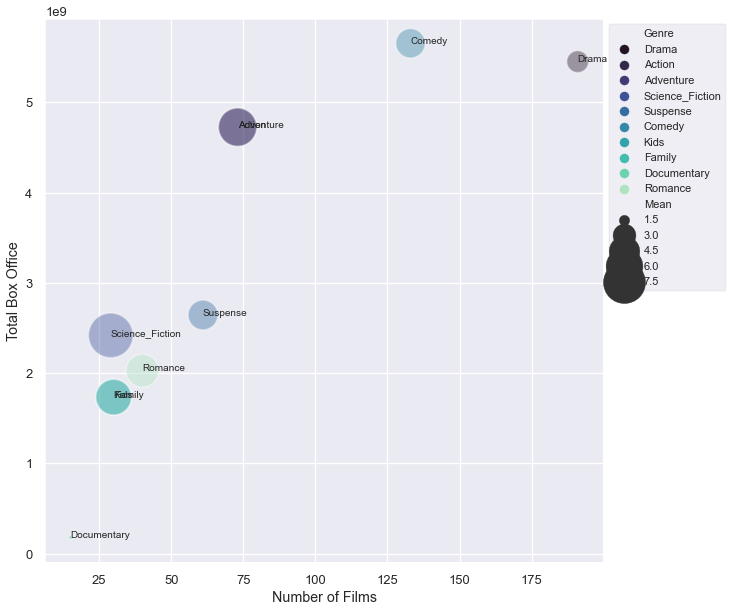

In [57]:
# create a scatterplot to visualize the relationship between the top ten Genres with total box office sales, 
# number of films, and mean 

plt.rcParams['figure.figsize'] = [10, 10]
sns.set_style("darkgrid")

x = merged_genre_clean['Number of Films']
y = merged_genre_clean['Total Box Office']

sns.scatterplot(data=merged_genre_clean, 
                x="Number of Films", 
                y="Total Box Office", 
                size="Mean", 
                hue="Genre", 
                palette="mako", 
                alpha=0.4, sizes=(20, 2000))

ax.set_title('Genre Efficiency: Movies 1998-2008')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)

for i, label in enumerate(genre_names):
    plt.annotate(label, (x[i], y[i]))

f.tight_layout()
plt.show()

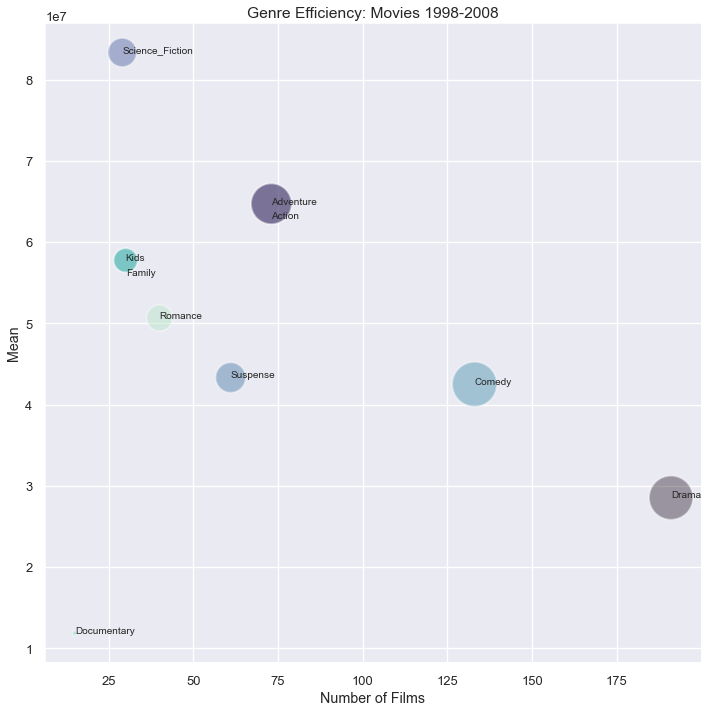

In [58]:
# above visual does not convey the story to the best of its ability
# change the axes of the scatterplot - swap y-axis to 'Mean' and bubble size to 'Total Box Office'

# this graph better conveys the data: the genres to the top left quadrant are the "most efficient,"
# while the genres on the bottom right quadrant are the most "mainstream" genres  

f, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 10]
sns.set_style("darkgrid")

x = merged_genre_clean['Number of Films']
y = merged_genre_clean['Mean']

sns.scatterplot(
    data=merged_genre_clean, 
    x="Number of Films", 
    y="Mean", 
    size="Total Box Office", 
    hue="Genre", 
    palette="mako", 
    alpha=0.4, 
    ax=ax, 
    sizes=(20, 2000)
)
ax.set_title('Genre Efficiency: Movies 1998-2008')

ax.get_legend().remove()

#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)

for i, label in enumerate(genre_names):
    if label in {"Action","Family"}:
        plt.annotate(label, xy=(x[i], y[i]-.18e7))
    else:
        plt.annotate(label, (x[i], y[i]))

f.tight_layout()
plt.show()

# Evaluation and Conclusions

We hope our preliminary analysis gives Microsoft Studios a solid foundation to understand the movie business. Our overall objective was to make Microsoft understand the fundamentals of the landscape (production budget, worldwide gross, competitive landscape/studios) and propose a launch plan both anchored in data and outside the box (launch timing, genre assortment)

**Summary of recommendations** 
* Plan for Production Budget of $30MM per film, particularly to be competitive with major studios 
* Consider launching outside of competitive months either in Q1 (Jan-Mar) or Q3 (Sep) 
* Launch with a mixture of "mainstream" genres (Drama, Comedy) and "efficient" genres (Science Fiction, Romance)
* With the information provided, work with Microsoft to determine Microsoft's Studios goals (studio brand identity, short and long term fiscal goals, etc.) 

***
**Further considerations:** 
* Depending on how Microsoft would like to move forward, there are several areas of opportunity to dig deeper. We would like to dig deeper into launch timing - for instance, understanding studio production budget and gross through the years (early years to more mature years) 
* Determine when studios reach a point of "maturity"
* Note: we did not perform a "return on investment" analysis because there are a lot of factors we'd like to consider outside of Worldwide Gross-Production Budget 
* Other areas of opportunity: gain deeper understanding and learn from efficient and/or esoteric studios and genres 

# Future Work

This is just the beginning! We can't wait to work together to launch Microsoft Studios with a bang, and build a studio for the future. 

**Future work:** 
* Determine how/if ratings impact performance 
* Model future trends for genres -> Discover/create "new" genres 
* Build long term movie launch strategy (type/genre by month) 
* Explore other movie consumption formats (streaming)
* Analyze Franchise movie data

APPENDIX: for future analysis - analyze actor and director data 

In [59]:
# file: imdb.name.basics.csv

df_imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv')
df_imdb_name_basics

# contains: 'nconst', 'primary_name', 'birth_year', 'death_year','primary_profession', 'known_for_titles'

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


APPENDIX: another data source for Genre data is IMDb

In [60]:
# file: imdb.title.basics.csv

imdb_genres = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdb_genres.drop_duplicates(inplace = True)
imdb_genres = imdb_genres.dropna(subset=['genres']).drop(columns=['tconst','original_title'])
imdb_genres

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146138,The Secret of China,2019,NaN,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy


APPENDIX: future analysis of Studio and Genre data combined 

In [61]:
top_five_studios = ['Universal Pictures','Sony Pictures', 'Warner Bros.', 'Walt Disney Pictures', '20th Century Fox']

top_five_studio_info = genre_info_twenty_years[genre_info_twenty_years.studio.isin(top_five_studios)].sort_values(by='Month')
top_five_studio_info

,rating,genre,theater_date,box_office,runtime,studio,Year,Month
349,R,Action | Adventure|Horror,"Apr 21, 2006",46982632,125 minutes,Sony Pictures,2006,Apr
1511,PG,Comedy,"Apr 13, 2012",41800000,92 minutes,20th Century Fox,2012,Apr
1331,PG-13,Action | Adventure|Drama|Mystery | Suspense,"Apr 29, 2011",209805005,131 minutes,Universal Pictures,2011,Apr
631,PG-13,Comedy|Romance,"Apr 26, 2002",14400987,103 minutes,20th Century Fox,2002,Apr
1033,PG-13,Comedy|Drama,"Apr 21, 2006",7156725,108 minutes,Universal Pictures,2006,Apr
...,...,...,...,...,...,...,...,...
414,R,Action | Adventure|Mystery | Suspense,"Oct 5, 2001",21254983,96 minutes,20th Century Fox,2001,Oct
1541,PG-13,Action | Adventure|Science Fiction | Fantasy,"Sep 30, 2005",25335935,119 minutes,Universal Pictures,2005,Sep
1321,PG-13,Action | Adventure|Mystery | Suspense,"Sep 30, 2005",18472363,110 minutes,Sony Pictures,2005,Sep
1445,PG-13,Drama|Musical | Performing Arts|Special Interest,"Sep 20, 2013",8888355,109 minutes,Sony Pictures,2013,Sep


APPENDIX: FUTURE ANALYSIS - ANALYZE STRONGEST PERFORMING **GENRE COMBINATIONS**

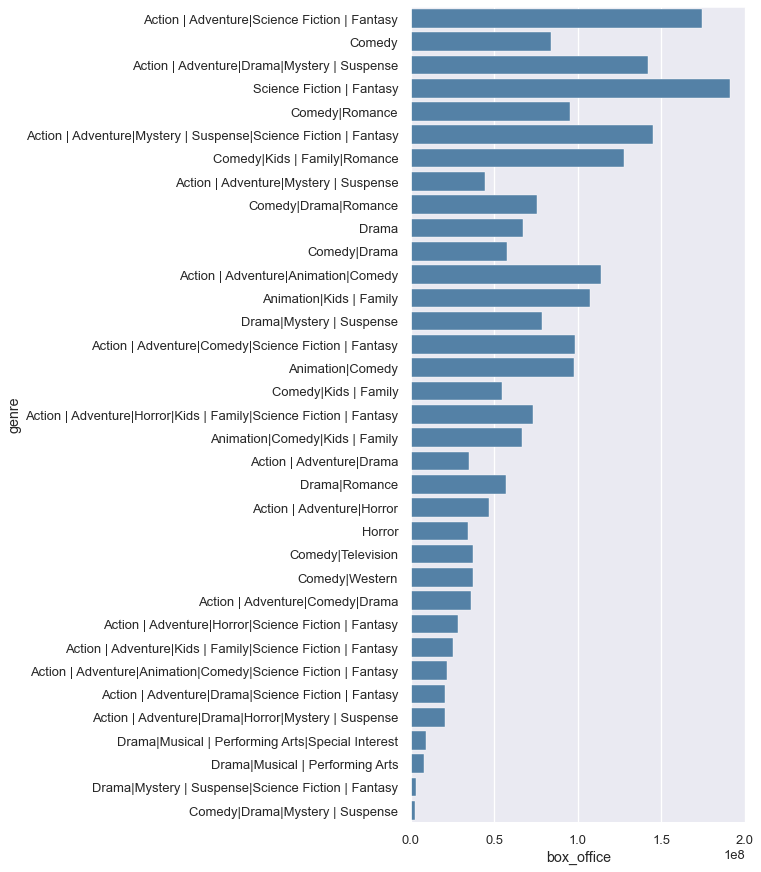

In [62]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set_style("darkgrid")

info = top_five_studio_info.sort_values("box_office", ascending=False)

sns.set_palette("mako")
sns.barplot(x="box_office", y="genre", data=info, ci=None, color="steelblue");